In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says YOUR CODE HERE or "YOUR ANSWER HERE", as well as your name and collaborators below:

# HW 1 - Forms of Error

## Question 1

Find the absolute error, relative error, and decimal precision (number of significant decimal digits) for the following $f$ and approximations $\hat{f}$.  Note that here we may also mean precision as compared to $f$.  In these cases use the absolute error to help define $\hat{f}$'s precision (each worth 5 points).

**(a)** $f = \pi$ and $\hat{f} = 3.14$

**(b)** $f = \pi$ and $\hat{f} = 22 / 7$

**(c)** $f = \log (n!)$ and $\hat{f} = n~log(n) - n$ for $n = 5, ~~ 10, ~~ 100$ (Stirling's approximation)

**(d)** $f = e^x$ and $\hat{f} = T_n(x)$ where $T_n(x)$ is the Taylor polynomial approximation to $e^x$ expanded about $x = 0$.  Consider $N = 1, 2, 3$.  What vaule of $N$ is required for this approximation to be good to 6 digits of decimal precision?

Liang Wei, UNI:lw2716

**a)**
```python
a = np.pi
b = 3.14
print a, b, a-b, (a-b)/a
```

absolute error = $|f-\hat f| = |\pi - 3.14|$ = 0.00159265358979

relative error = $\frac{error_{absolute}}{\pi}$ = 0.000506957382897
   
absolute decimal precision = 3
   
**b)**  
```python
a = np.pi
b = 22.0/7.0
print a, b, a - b, (a-b)/a
```
absolute error = $|f - \hat f| = |\pi - \frac{22}{7}|$ = 0.00126448926735

relative error = $\frac{absolute error}{\pi}$ = 0.000402499434771
   
decimal precision = 3
   
**c)** 
```python
import scipy.misc as misc
a = np.log(misc.factorial(100.0))
b = 100.0 * np.log(100.0) - 100.0
print a, b, a-b, (a - b)/a
```

**for n = 5:**

absolute error = $|f - \hat f| = |log(5!) - (5 \times log(5) - 5)|$ = 1.74030218061

relative error = $\frac{absolute error}{log(5!)}$ = 0.363510220824
              
absolute decimal precision = 0, relative decimal precision = 0
              
**for n = 10:** 
   
absolute error = $|f - \hat f| = |log(10!) - (10 \times log(10) - 10)|$ = 2.07856164314
   
relative error = $\frac{absolute error}{log(10!)}$= 0.137612875249
               
absolute decimal precision = 1, relative decimal precision = 0
               
**for n = 100:** 
   
absolute error = $|f - \hat f| = |log(100!) - (100 \times log(100) - 100)|$ = 3.22235695675
   
relative error = $\frac{absolute error}{log(100!)}$ = 0.00885897203687
                
absolute decimal precision = 2, relative decimal precision = 2
   
   
   
**d)**
```python
import sympy
import scipy.misc as misc
def lamda(x):
    n = 1
    Tn = 1
    while n <= 100:
        Tn = Tn + x**n/misc.factorial(n)
        if np.exp(x) - Tn < 0.000009:
            return n, Tn
        else:
            n = n + 1
    else:
        print x
        
    lamda(1)
```
```python
a = np.exp(1)
b = lamda(1)
absolute error = np.absolute(a - b)/a
```
**$T_{1}(1)$** 

absolute error = $|f - \hat f| = |e^{1} - T_{1}(1)|$ = 0.718281828459
   
relative error = $\frac{absolute error}{f}$ = 0.264241117657
   
decimal precision = 1
   
**$T_{1}(2)$**
   
absolute error = $|f - \hat f| = |e^{1} - T_{1}(2)|$  = 0.218281828459
   
relative error = $\frac{absolute error}{f}$ = 0.0803013970714
   
decimal precision = 1
   
**$T_{1}(3)$**
   
absolute error = $|f - \hat f| = |e^{1} - T_{1}(3)|$ = 0.0516151617924
   
relative error = $\frac{absolute error}{f}$ = 0.0189881568762
   
decimal precision = 2
   
If we want to get decimal precision as good as 6 digits, when we take x = 1, the N would be 8.

## Question 2

**(a)** (10) Write a Python program to compute

$$S_N = \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ] = \sum^N_{n=1} \frac{1}{n (n + 1)}$$

once using the first summation and once using the second for $N = 10, 10^2, \ldots , 10^7$.

In [2]:
def sum_1(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """
    
    # INSERT CODE HERE
    Sn = 0.0
    Sn += sum(1.0/n - 1.0/(n + 1) for n in xrange(1, N + 1))
    return Sn


def sum_2(N):
    """Compute the summation S_N defined as
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns Sn (float)
    """

    # INSERT CODE HERE
    Sn = 0.0
    Sn += sum(1.0/(n * (n + 1)) for n in xrange(1, N + 1))
    return Sn
#print sum_1(10)
#print sum_2(1000)

In [3]:
N = numpy.array([10**n for n in xrange(1,8)])
answer = numpy.zeros((2, N.shape[0]))
for (n, upper_bound) in enumerate(N):
    answer[0, n] = sum_1(upper_bound)
    answer[1, n] = sum_2(upper_bound)
numpy.testing.assert_allclose(answer[0, :], numpy.array([0.9090909090909089, 0.9900990099009896, 
                                                         0.9990009990009996, 0.9999000099990004, 
                                                         0.9999900001000117, 0.9999990000010469,
                                                         0.9999998999998143]))
numpy.testing.assert_allclose(answer[1, :], numpy.array([0.9090909090909091, 0.9900990099009898, 
                                                         0.9990009990009997, 0.9999000099990007, 
                                                         0.9999900001000122, 0.9999990000010476, 
                                                         0.9999998999998153]))
print "Success!"

Success!


**(b)**  (5) Compute the absolute error between the two summation approaches. 

In [4]:
def abs_error(N):
    """Compute the absolute error of the two sums defined as
    
    \sum^N_{n=1} \left [ \frac{1}{n} - \frac{1}{n+1} \right ]
    
    and 
    
    \sum^N_{n=1} \frac{1}{n (n + 1)}
    
    respectively for the given N.
    
    :Input:
     *N* (int) The upper bound on the summation.
    
    Returns *error* (float)
    """
    
    # INSERT CODE HERE
    abs_error = numpy.absolute(sum_1(N) - sum_2(N))
    return abs_error
#print abs_error(10)

In [5]:
N = numpy.array([10**n for n in xrange(1,8)])
answer = numpy.zeros(N.shape)
for (n, upper_bound) in enumerate(N):
    answer[n] = abs_error(upper_bound)
numpy.testing.assert_allclose(answer, numpy.array([1.1102230246251565e-16, 1.1102230246251565e-16, 
                                                   1.1102230246251565e-16, 3.3306690738754696e-16, 
                                                   4.4408920985006262e-16, 6.6613381477509392e-16, 
                                                   9.9920072216264089e-16]))
print "Success!"

Success!


**(c)** (10) Plot the relative and absolute error versus $N$.  Also plot a line where $\epsilon_{\text{machine}}$ should be.  Comment on what you see.

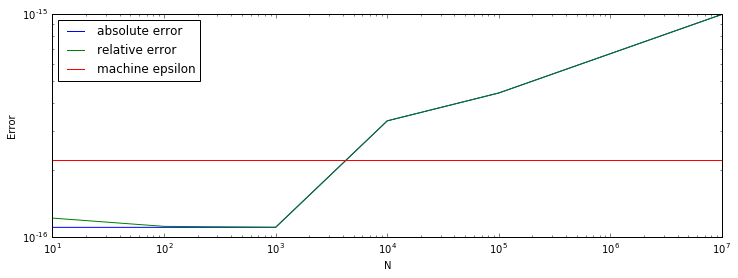

In [6]:
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2)

# HINT!  Use the plotting function semilogx to plot the errors
#        Also, do not forget to label your plot

# INSERT CODE HERE

x = [10, 100, 1000, 10000, 100000, 1000000, 10000000]


def sum_1(N):
    
    N = numpy.array([10**n for n in xrange(1, 8)])
    Sn = []
    for (n, upper_bound) in enumerate(N):
        Sn.append(numpy.sum((1.0/i) - (1.0/(i + 1)) for i in xrange(1, upper_bound + 1)))
    return Sn

result_1 = sum_1(10)

def sum_2(N):
    N = numpy.array([10**n for n in xrange(1, 8)])
    Sn = []
    for (n, upper_bound) in enumerate(N):
        Sn.append(numpy.sum((1.0/(i*(i+1)) for i in xrange(1, upper_bound + 1))))
    return Sn

result_2 = sum_2(10)

absolute_error = numpy.absolute(numpy.subtract(result_1, result_2))
relative_error = absolute_error/result_1


axes = fig.add_subplot(1, 1, 1)
axes.loglog(x, absolute_error, label = "absolute error")
axes.loglog(x, relative_error, label = "relative error")

epsilon = numpy.finfo(float).eps
machine_epsilon = [epsilon, epsilon, epsilon, epsilon, epsilon, epsilon, epsilon]
axes.loglog(x, machine_epsilon, label = "machine epsilon")
axes.legend(loc=2)            
axes.set_xlabel("N")
axes.set_ylabel("Error")

plt.show()

Comment: when N is small, the error is also small. When N goes bigger, the error goes bigger. And it increases fast
    during $10^3$ and $10^4$. Later, the rate of increase decreased, but it still goes bigger.

**(d)** (5) Theorize what may have lead to the differences in answers.

When N becomes bigger, the absolute error goes bigger. Since everytime we calculate $\frac{1}{n}$, $\frac{1}{n + 1}$ and $\frac{1}{n \times (n +1)}$ they would lose accruary, the error finally will accumulated.

## Question 3

Following our discussion in lecture regarding approximating $e^x$ again consider the Taylor polynomial approximation:

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

**(a)** Derive the upper bound on the *relative error* assuming that $x > 0$ and

$$R_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$R_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

Let's define $E(x)$ is the difference (absolute error) between $e^{x}$ and Taylor polynomial approximation $T_{n}(x)$. So, $$E(x) = |e^{x} - T_{n}(x)|$$

the relative error $$R_{n} = |\frac{E(x)}{f(x)}|$$, $$f(x) = e^{x}$$

First, when $x = 0$, $e^{0} = 1$, $T_{n}(0) = 1$, $E_{x} = 0$. At $x = 0$, if we take $n$ derivative of both sides, we have $E^{(n)}(x) = f^{(n)}(x) - T^{(n)}_{n}(x) = 0$. 

Furthermore, if we take $n+1$ derivative of both sides, let's bound to $$E^{(n+1)}(x)\leq M$$

we have $$E^{(n+1)}(x) = f^{(n+1)}(x) - T^{(n+1)}_{n}(x) \leq M$$

In this equation, since $T_{n}$ only has $n$ degree, thus, $$T^{(n+1)}_{n} = 0$$ 

We have  $$f^{(n+1)}(x) \leq M$$

Then, we intergal both side, we will get $$E^{(n)}(x) = f^{(n)}(x) \leq Mx + C$$

We want to choose C as minimum as possible. So, if we put $x = 0$ here, $0\leq C$, we choose $C = 0$. Keep doing this for n times. We will have $$E(x) \leq \frac{Mx^{n+1}}{(n + 1)!} $$

Now, the relative error $$R_{n} = |\frac{E(x)}{e^{x}}| \leq E(x)$$ since $|e^{x}|>0$ all the time. 

Thus, $$R_{n} \leq M|\frac{x^{n+1}}{(n+1)!}|$$

Since $e^{x}$ could be any number bigger than 0, if we choose $M = e^{x}$, we will have $$R_{n} \leq |\frac{x^{n+1}}{(n+1)!}|$$

**(b)** Show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

From (a), we have $$R_{n} \leq |\frac{x^{n+1}}{(n+1)!}|$$ If we can prove $$|\frac{x^{n+1}}{(n+1)!}| \leq \epsilon$$ We can prove $$R_{n} \leq \epsilon$$ 

We times $(n + 1)!$ on both sides, then we get $$x^{n+1} \leq \epsilon_{machine}(n + 1)!$$ 

We put $\log$ on each side, since $\log$ function is monotonic, we have $$(n+1)\log(x) \leq \log(\epsilon) + \log(n+1)!$$

Next, from Stirling's approximation, we have $$\log(n+1)! \approx (n+1)\log(n+1) - (n+1)$$

Thus, we have $$(n+1)\log(x) \leq \log(\epsilon) + (n+1)\log(n+1) - (n+1)$$

Divide $n+1$ on each side, we have $$\log(x) \leq \frac{\log(\epsilon)}{n+1} + \log(n+1) - 1$$

Since $\log(\epsilon)$ is very small, especially divided by $n+1$ when n is a large number. This item gone. 

Also, when n is large, $\log(n) \approx \log(n+1)$ 

Then, we have $$1 \leq \log(n) - \log(x)$$

which implies $$1 \leq \log(\frac{n}{x})$$

Here, we take exponential of them and get $$e^1 \leq e^{\log(\frac{n}{x})}$$ 

We have $$e \leq \frac{n}{x}$$ 

Then we get $$n \geq e \cdot x$$

So, because $R_{n} \leq |\frac{x^{n+1}}{(n+1)!}|$ we proved if $R_{n} \leq \epsilon$ we need at least $n \geq e \cdot x$

**(c)** Write a Python function that accurately computes $T_n$ to the specified relative error tolerance and returns both the estimate on the range and the number of terms in the series needed over the interval $[-2, 2]$.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$.

Make sure to document your code including expected inputs, outputs, and assumptions being made.

In [7]:
# HINT: Think about how we evaluated polynomials efficiently in class

import scipy.misc as misc
import sympy

def Tn_exp(x, tolerance=1e-3):
    """This function takes x as input, compute how many terms we need to get T(n) close to e^x
    
    with an acceptable relative error. It returns both the estimate on the range and the number
    
    of terms in the series needed over the interval [-2, 2].
    
    """
    MAX_N = 100
    
    # INSERT CODE HERE
    n = 1
    Tn = 1.0
    while n <= MAX_N:
        Tn = Tn + x**n/misc.factorial(n)
        abs_error = numpy.absolute(numpy.exp(x) - Tn)
        rel_error = abs_error / numpy.exp(x)
        if numpy.all(rel_error < tolerance):
            break
        else:
            n = n + 1
    else: 
        print "n reach max"
    
    return Tn, n
#Tn_exp(2, tolerance = 1e-3)

In [8]:
x = numpy.linspace(-2, 2, 100)
tolerance = 8.0 * numpy.finfo(float).eps
answer, N = Tn_exp(x, tolerance=tolerance)
assert(numpy.all(numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x)) < tolerance))
print "Success!"

Success!


## Question 4

Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + \mathcal{O}(\Delta x^4)$$

and

$$\cosh \Delta x = 1 - \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \mathcal{O}(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $\mathcal{O}$).


From the theorem on class, we have

$$f(\Delta x) = p(\Delta x) + O(\Delta x^n)$$
$$g(\Delta x) = q(\Delta x) + O(\Delta x^m)$$
$$r = \min(n, m)$$ then

$$f+g = p + q + O(\Delta x^r)$$

$$f \cdot g = p \cdot q + p \cdot O(\Delta x^m) + q \cdot O(\Delta x^n) + O(\Delta x^{n+m}) = p \cdot q + O(\Delta x^r)$$

so when we add them up, define $$f(\Delta x) = \frac{1}{1-\Delta x}$$ and $$g(\Delta x) = cosh\Delta x$$

we have $$f+g = 2 + \Delta x - \frac{\Delta x^2}{2} + \Delta x^3 + \mathcal{O}(\Delta x^4) + \mathcal{O}(\Delta x^6)$$ Since $\Delta x$ is a small number, $$\Delta x^4 \geq \Delta x^6$$ 

In this case, the order of approximation for their sum is 4.

When we multiply them up, we have $$f \cdot g = 1 + \Delta x + \frac{3 \Delta x^2}{2} + \frac{\Delta x^3}{2} + \mathcal{O}(\Delta x^4) - \frac{\Delta x^5}{4} + \mathcal{O}(\Delta x^6) + \mathcal{O}(\Delta x^7) + \Delta x^9 + \Delta x^{10} $$ In this case, since $\Delta x$ is a small number, $\mathcal{O}(x^4)$ is the biggest big-O item, thus, the order of approximation for their product is also 4.